# Intepretation

In [1]:
from config import plotly_id, plotly_key
import classifiers as clf

import pandas as pd
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import pickle

plotly.tools.set_credentials_file(username=plotly_id, api_key=plotly_key)

### Load Estimators

In [2]:
baseline = pd.read_pickle("../Data/baseline.pkl")
balanced = pd.read_pickle("../Data/balanced.pkl")
y_labels = pd.read_pickle("../Data/y_labels.pkl")

### Confusion Matrix

In [3]:
# best estimators of test sets
best_estimators = pd.concat([
    baseline[baseline['Split'] == 'Test'],
    balanced[balanced['Split'] == 'Test']],
    ignore_index=True)

best_estimators

,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Baseline,Dummy,{'strategy': 'most_frequent'},Test,0.773568,0.598408,0.773568,0.674807,"[[1756, 0, 0], [156, 0, 0], [358, 0, 0]]"
1,Baseline,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Test,0.773568,0.598408,0.773568,0.674807,"[[1756, 0, 0], [156, 0, 0], [358, 0, 0]]"
2,Baseline,Multinomial Naive Bayes,"{'alpha': 0.0, 'fit_prior': True}",Test,0.773568,0.598408,0.773568,0.674807,"[[1756, 0, 0], [156, 0, 0], [358, 0, 0]]"
3,Baseline,K Nearest Neighbors,"{'algorithm': 'ball_tree', 'leaf_size': 200}",Test,0.723348,0.625241,0.723348,0.665817,"[[1619, 29, 108], [141, 1, 14], [330, 6, 22]]"
4,Baseline,Decision Tree,"{'criterion': 'gini', 'min_impurity_decrease':...",Test,0.773568,0.598408,0.773568,0.674807,"[[1756, 0, 0], [156, 0, 0], [358, 0, 0]]"
5,Baseline,Random Forest,"{'min_impurity_decrease': 0.01, 'n_estimators'...",Test,0.773568,0.598408,0.773568,0.674807,"[[1756, 0, 0], [156, 0, 0], [358, 0, 0]]"
6,Baseline,Ada Boost,"{'learning_rate': 0.5, 'n_estimators': 100}",Test,0.773568,0.598408,0.773568,0.674807,"[[1756, 0, 0], [156, 0, 0], [358, 0, 0]]"
7,Balanced,Dummy,{'strategy': 'stratified'},Test,0.325551,0.623644,0.325551,0.391296,"[[557, 635, 564], [52, 55, 49], [119, 112, 127]]"
8,Balanced,Logistic Regression,"{'C': 100.0, 'fit_intercept': True, 'multi_cla...",Test,0.381057,0.690366,0.381057,0.448673,"[[640, 544, 572], [46, 55, 55], [74, 114, 170]]"
9,Balanced,Multinomial Naive Bayes,"{'alpha': 0.0, 'fit_prior': True}",Test,0.404846,0.637179,0.404846,0.473119,"[[834, 922, 0], [71, 85, 0], [115, 243, 0]]"


In [4]:
# plot accuracy
accuracy = best_estimators.pivot(index='Classifier',columns='Data',values='Accuracy')
accuracy = accuracy[['Baseline', 'Balanced']]
accuracy

Data,Baseline,Balanced
Classifier,,
Ada Boost,0.773568,0.418502
Decision Tree,0.773568,0.418502
Dummy,0.773568,0.325551
K Nearest Neighbors,0.723348,0.404846
Logistic Regression,0.773568,0.381057
Multinomial Naive Bayes,0.773568,0.404846
Random Forest,0.773568,0.108370


In [5]:
# plot F1 scores
f1_scores = best_estimators.pivot(index='Classifier',columns='Data',values='F1 Score')
f1_scores = f1_scores[['Baseline', 'Balanced']]
f1_scores

Data,Baseline,Balanced
Classifier,,
Ada Boost,0.674807,0.492182
Decision Tree,0.674807,0.498325
Dummy,0.674807,0.391296
K Nearest Neighbors,0.665817,0.475222
Logistic Regression,0.674807,0.448673
Multinomial Naive Bayes,0.674807,0.473119
Random Forest,0.674807,0.053397


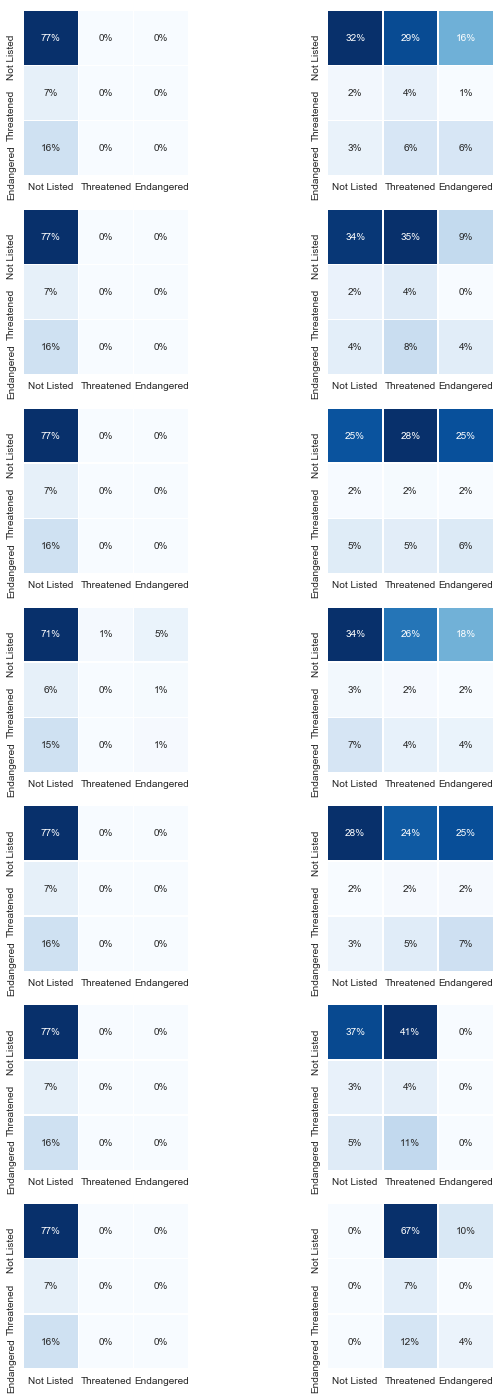

In [6]:
# plot confusion matrices
confusion_matrices = best_estimators.pivot(index='Classifier',columns='Data',values='Confusion Matrix')
confusion_matrices = confusion_matrices[['Baseline', 'Balanced']]
cm, axes = clf.plot_confusion_matrices(confusion_matrices, list(y_labels[0]))

### Feature Importance

In [ ]:
grid_searches[0]['Classifier'].best_estimator_.coef_[0]

In [ ]:
best_log_params = list(zip(X.columns, grid_searches[0]['Classifier'].best_estimator_.coef_[0]))
best_log_params.sort(key = lambda x: abs(x[1]), reverse=True)
best_log_params

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  

# Rearrange feature names so they match the sorted feature importances
model_features = [i[0] for i in best_log_params]

feature_weights = [abs(i[1]) for i in best_log_params]

# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(model_features, feature_weights)

# Add feature names as x-axis labels
# plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xticks(rotation=90)

# Show plot
plt.show()

### Classifier Performance

In [ ]:
# create performance visualization in Plotly
hover_text  = []
color_range = []

for index, row in baseline.iterrows():
    hover_text.append(('Parameters: {params}<br>'+
                       'Split: {split}').format(params=row['Parameters'],
                                                split=row['Split']))
#    color_range.append(min(row['Dogs per Store'],120))

trace0 = go.Scatter(
    x=baseline['Accuracy'],
    y=baseline['F1 Score'],
    text=hover_text,
    mode='markers',
    marker=dict(
#        size=bcg_matrix['Stores'],
#        color=color_range,
        showscale=True,
        reversescale=True,
        colorbar=dict(
                title='Dogs Per Store'
            ),
        colorscale='RdBu'
    )
)

data = [trace0]
layout = go.Layout(
    title='Baseline',
    xaxis=dict(
        title='Model Performance Metric [Accuracy]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Model Performance Metric [F1 Score]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='endangered-species')